In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

In [5]:
data= pd.read_csv('Stock Market Dataset.csv')


In [7]:
data.head()

,Unnamed: 0,Date,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Price,Bitcoin_Vol.,...,Berkshire_Price,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.
0,0,02-02-2024,2.079,NaN,72.28,NaN,3.8215,NaN,"43,194.70",42650,...,"5,89,498",10580,564.64,4030000,171.81,117220000,474.99,84710000,"2,053.70",NaN
1,1,01-02-2024,2.050,161340.0,73.82,577940.0,3.8535,NaN,"43,081.40",47690,...,"5,81,600",9780,567.51,3150000,159.28,66360000,394.78,25140000,"2,071.10",260920.0
2,2,31-01-2024,2.100,142860.0,75.85,344490.0,3.9060,NaN,"42,580.50",56480,...,"5,78,020",9720,564.11,4830000,155.20,49690000,390.14,20010000,"2,067.40",238370.0
3,3,30-01-2024,2.077,139750.0,77.82,347240.0,3.9110,NaN,"42,946.20",55130,...,"5,84,680",9750,562.85,6120000,159.00,42290000,400.06,18610000,"2,050.90",214590.0
4,4,29-01-2024,2.490,3590.0,76.78,331930.0,3.8790,NaN,"43,299.80",45230,...,"5,78,800",13850,575.79,6880000,161.26,42840000,401.02,17790000,"2,034.90",1780.0


In [9]:

# Basic Information and Summary Stats
data.info()
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1243 entries, 0 to 1242
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1243 non-null   int64  
 1   Date               1243 non-null   object 
 2   Natural_Gas_Price  1243 non-null   float64
 3   Natural_Gas_Vol.   1239 non-null   float64
 4   Crude_oil_Price    1243 non-null   float64
 5   Crude_oil_Vol.     1220 non-null   float64
 6   Copper_Price       1243 non-null   float64
 7   Copper_Vol.        1206 non-null   float64
 8   Bitcoin_Price      1243 non-null   object 
 9   Bitcoin_Vol.       1243 non-null   int64  
 10  Platinum_Price     1243 non-null   object 
 11  Platinum_Vol.      636 non-null    float64
 12  Ethereum_Price     1243 non-null   object 
 13  Ethereum_Vol.      1243 non-null   int64  
 14  S&P_500_Price      1243 non-null   object 
 15  Nasdaq_100_Price   1243 non-null   object 
 16  Nasdaq_100_Vol.    1242 

,Unnamed: 0,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Vol.,Platinum_Vol.,Ethereum_Vol.,...,Nvidia_Price,Nvidia_Vol.,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Vol.
count,1243.000000,1243.000000,1239.000000,1243.000000,1.220000e+03,1243.000000,1206.000000,1.243000e+03,636.000000,1.243000e+03,...,1243.000000,1.243000e+03,1243.000000,1243.000000,1.243000e+03,1243.000000,1.243000e+03,1243.000000,1.243000e+03,1241.000000
mean,621.000000,3.494714,131624.116223,67.577064,3.989038e+05,3.541957,35406.616915,4.033918e+07,9082.515723,1.801563e+07,...,187.285841,4.560298e+07,2426.524537,404.839541,7.057401e+06,128.683234,7.413005e+07,239.728134,2.325851e+07,211127.671233
std,358.967501,1.822540,64385.141749,20.465500,2.161619e+05,0.702819,38415.448731,2.940889e+08,8876.538587,1.326933e+08,...,134.679941,1.869107e+07,2660.497572,114.989473,6.384187e+06,30.808631,3.245753e+07,71.015427,1.555486e+07,115006.351292
min,0.000000,1.482000,1200.000000,-37.630000,1.702000e+04,2.100500,10.000000,2.600000e+02,0.000000,7.518000e+04,...,33.450000,9.790000e+06,80.000000,166.370000,1.140000e+06,79.410000,1.763000e+07,88.910000,5.470000e+06,0.000000
25%,310.500000,2.347500,91900.000000,55.095000,2.835975e+05,2.858750,370.000000,7.907500e+04,1120.000000,5.883600e+05,...,73.905000,3.245000e+07,345.000000,323.010000,3.990000e+06,96.260000,5.264500e+07,183.355000,1.478500e+07,152200.000000
50%,621.000000,2.702000,127370.000000,69.230000,3.668850e+05,3.666000,10180.000000,2.153100e+05,6070.000000,1.570000e+06,...,151.590000,4.279000e+07,1510.000000,384.150000,5.610000e+06,128.730000,6.520000e+07,224.430000,1.934000e+07,197970.000000
75%,931.500000,4.055500,169460.000000,80.455000,5.072425e+05,4.137250,68340.000000,6.151050e+05,15287.500000,9.365000e+06,...,242.140000,5.511500e+07,3225.000000,495.365000,7.910000e+06,158.110000,8.674500e+07,301.650000,2.711500e+07,257920.000000
max,1242.000000,9.647000,381970.000000,123.700000,1.770000e+06,4.937500,176040.000000,4.470000e+09,42830.000000,1.790000e+09,...,661.600000,1.534600e+08,13850.000000,691.690000,1.333900e+08,186.570000,3.113500e+08,474.990000,2.304100e+08,813410.000000


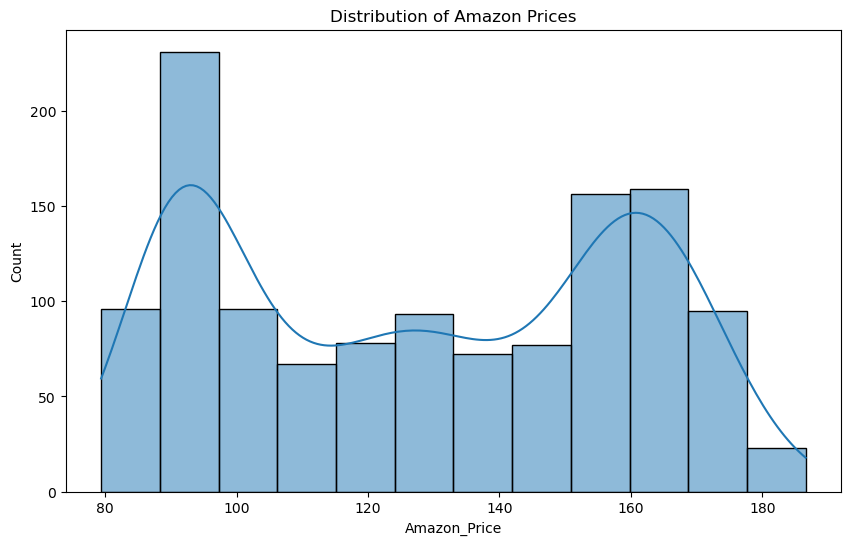

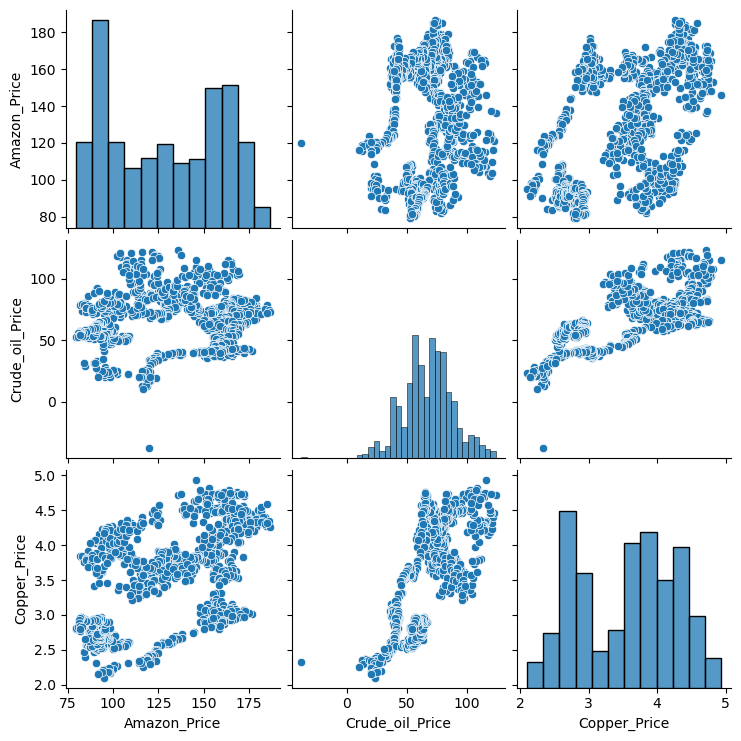

In [13]:
# Visualize distribution of the target variable (Amazon_Price)
plt.figure(figsize=(10,6))
sns.histplot(data['Amazon_Price'], kde=True)
plt.title('Distribution of Amazon Prices')
plt.show()

# Scatter plots for some feature relations with Amazon_Price
sns.pairplot(data[['Amazon_Price', 'Crude_oil_Price', 'Copper_Price', 'Gold_Price']])
plt.show()


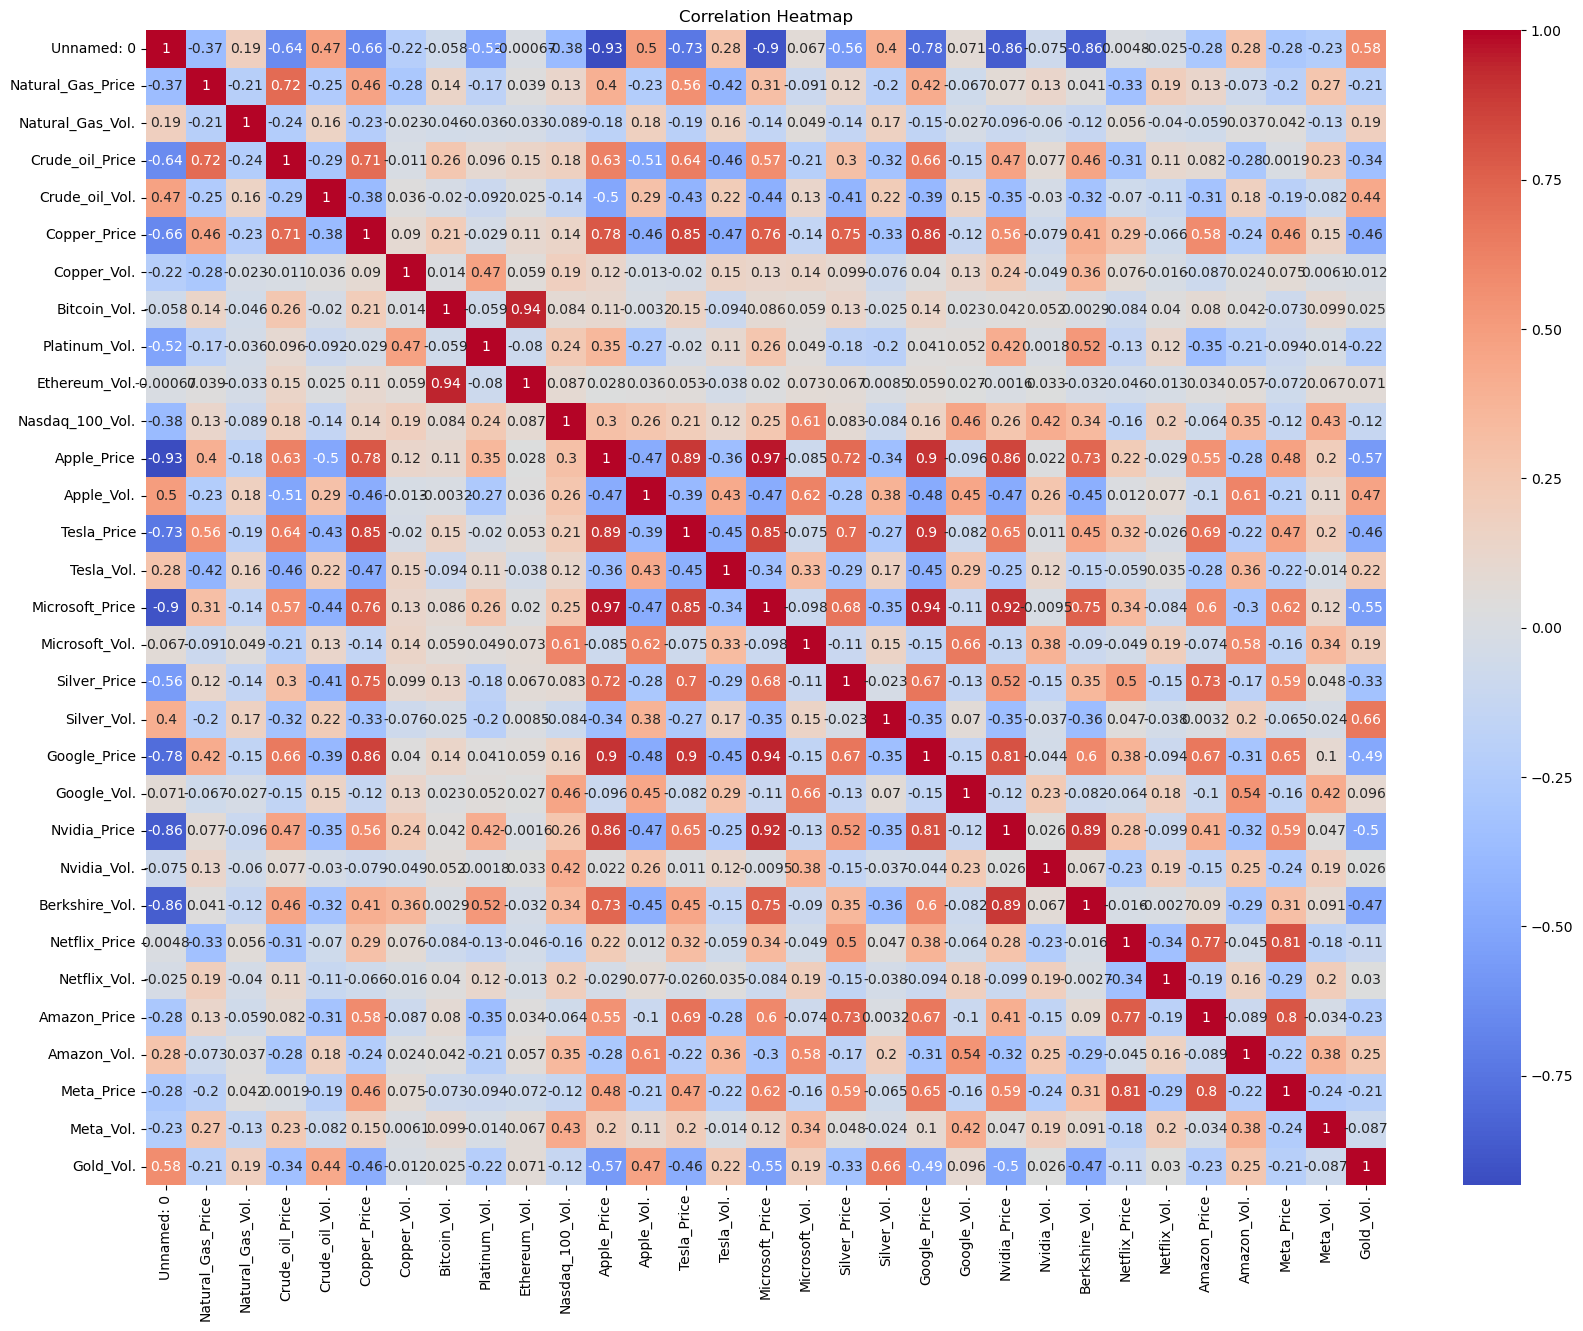

In [29]:
# Exclude non-numeric columns like 'Date'
numeric_data = data.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr_matrix = numeric_data.corr()

# Plot the correlation heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [41]:
# Handle missing values only for numeric columns
numeric_cols = data.select_dtypes(include=[np.number]).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

# Check for any remaining NaN values
print("Checking for NaN values after filling missing data:")
print(data.isna().sum())

# Check for infinite values and replace them with NaN, then fill them with column mean
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

# Recheck for NaN or infinite values
print("Checking for any remaining NaN or infinite values after replacement:")
print(data.isna().sum())

# Features (X) and Target (y)
X = data.drop(columns=['Amazon_Price', 'Date'])  # Ensure 'Date' is excluded as it's non-numeric
y = data['Amazon_Price']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting data into train and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


Checking for NaN values after filling missing data:
Unnamed: 0              0
Date                 1243
Natural_Gas_Price       0
Natural_Gas_Vol.        0
Crude_oil_Price         0
Crude_oil_Vol.          0
Copper_Price            0
Copper_Vol.             0
Bitcoin_Price        1243
Bitcoin_Vol.            0
Platinum_Price          0
Platinum_Vol.           0
Ethereum_Price          0
Ethereum_Vol.           0
S&P_500_Price        1243
Nasdaq_100_Price     1243
Nasdaq_100_Vol.         0
Apple_Price             0
Apple_Vol.              0
Tesla_Price             0
Tesla_Vol.              0
Microsoft_Price         0
Microsoft_Vol.          0
Silver_Price            0
Silver_Vol.             0
Google_Price            0
Google_Vol.             0
Nvidia_Price            0
Nvidia_Vol.             0
Berkshire_Price      1243
Berkshire_Vol.          0
Netflix_Price           0
Netflix_Vol.            0
Amazon_Price            0
Amazon_Vol.             0
Meta_Price              0
Meta_Vol.   

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [49]:
from sklearn.impute import SimpleImputer

# Initialize the imputer for numeric columns, here using mean
imputer = SimpleImputer(strategy='mean')

# Impute the missing values in both training and test sets
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions on test data
y_pred = model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')


MAE: 5.666041177980104
MSE: 51.93178779730315
RMSE: 7.206371333570256


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\impute\_base.py:577: UserWarning: Skipping features without any observed values: [ 7 13 14 28 35]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\impute\_base.py:577: UserWarning: Skipping features without any observed values: [ 7 13 14 28 35]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [51]:
# Cross-validation (5-fold)
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)
print(f'Cross-Validation RMSE Scores: {cv_rmse_scores}')
print(f'Average CV RMSE: {cv_rmse_scores.mean()}')
print(f'Standard Deviation CV RMSE: {cv_rmse_scores.std()}')


Cross-Validation RMSE Scores: [8.16973729 7.43225452 7.5323876  7.48384779 7.50260736]
Average CV RMSE: 7.62416691115465
Standard Deviation CV RMSE: 0.2747242353063886


Available columns in the DataFrame:
Index(['Unnamed: 0', 'Date', 'Natural_Gas_Price', 'Natural_Gas_Vol.',
       'Crude_oil_Price', 'Crude_oil_Vol.', 'Copper_Price', 'Copper_Vol.',
       'Bitcoin_Price', 'Bitcoin_Vol.', 'Platinum_Price', 'Platinum_Vol.',
       'Ethereum_Price', 'Ethereum_Vol.', 'S&P_500_Price', 'Nasdaq_100_Price',
       'Nasdaq_100_Vol.', 'Apple_Price', 'Apple_Vol.', 'Tesla_Price',
       'Tesla_Vol.', 'Microsoft_Price', 'Microsoft_Vol.', 'Silver_Price',
       'Silver_Vol.', 'Google_Price', 'Google_Vol.', 'Nvidia_Price',
       'Nvidia_Vol.', 'Berkshire_Price', 'Berkshire_Vol.', 'Netflix_Price',
       'Netflix_Vol.', 'Amazon_Price', 'Amazon_Vol.', 'Meta_Price',
       'Meta_Vol.', 'Gold_Price', 'Gold_Vol.'],
      dtype='object')


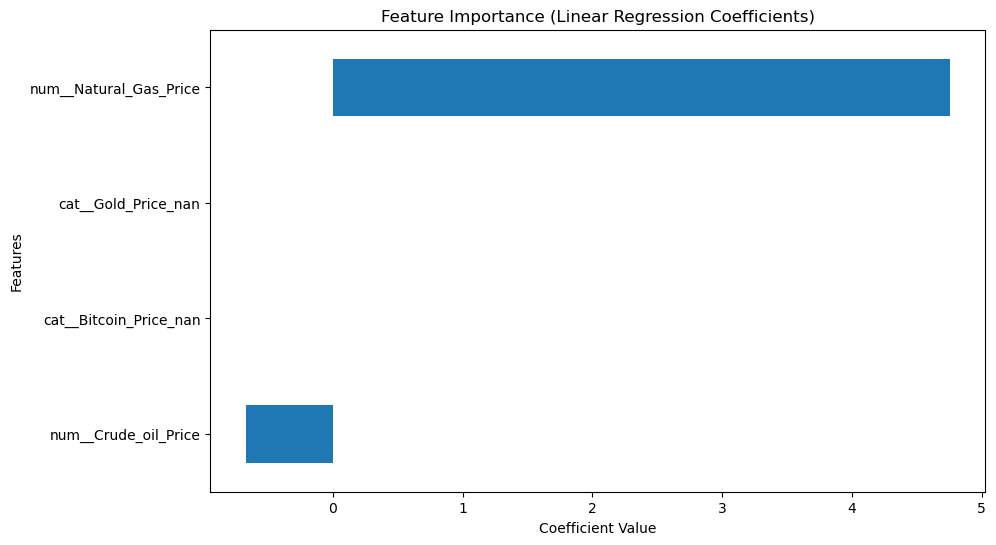

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Assuming 'data' is your original DataFrame before any preprocessing
# Print the columns of the DataFrame to verify the available features
print("Available columns in the DataFrame:")
print(data.columns)

# Define your features and target variable
X = data.drop(columns=['Amazon_Price', 'Date'])  # Features
y = data['Amazon_Price']  # Target variable

# Verify the features and adjust as necessary
# Define numerical and categorical features

numerical_features = ['Natural_Gas_Price', 'Crude_oil_Price']  # Example of numerical features
categorical_features = ['Bitcoin_Price', 'Gold_Price']  # Example of categorical features (after possible binning or treating as categorical)

# Check if defined features are in the DataFrame
for feature in numerical_features + categorical_features:
    if feature not in X.columns:
        print(f"Warning: {feature} is not in the DataFrame columns.")

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

# Fit and transform the training data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train_transformed, y_train)

# Get feature names after transformation
transformed_columns = preprocessor.get_feature_names_out()

# Feature Importance Analysis (Linear Regression Coefficients)
coefficients = pd.Series(model.coef_, index=transformed_columns)
coefficients = coefficients.sort_values()

# Plot the feature importance
plt.figure(figsize=(10, 6))
coefficients.plot(kind='barh')
plt.title('Feature Importance (Linear Regression Coefficients)')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.show()
